# Importaciones

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.linear_model import ElasticNetCV, ElasticNet,LogisticRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Para mostrar el arbol de decision
from sklearn.tree import export_graphviz, plot_tree
from six import StringIO
from IPython.display import Image  
from IPython.display import Image  
import pydotplus

# Introduccion de Variables

Attribute information:

     1. Class: DIE, LIVE
     
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     
     3. SEX: male, female
     
     4. STEROID: no, yes
     
     5. ANTIVIRALS: no, yes
     
     6. FATIGUE: no, yes
     
     7. MALAISE: no, yes
     
     8. ANOREXIA: no, yes
     
     9. LIVER BIG: no, yes
     
    10. LIVER FIRM: no, yes
    
    11. SPLEEN PALPABLE: no, yes
    
    12. SPIDERS: no, yes
    
    13. ASCITES: no, yes
    
    14. VARICES: no, yes
    
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
        
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    
    20. HISTOLOGY: no, yes

In [91]:
column_names = [
    'Class', 
    'AGE', 
    'SEX', 
    'STEROID', 
    'ANTIVIRALS', 
    'FATIGUE', 
    'MALAISE', 
    'ANOREXIA', 
    'LIVER BIG', 
    'LIVER FIRM', 
    'SPLEEN PALPABLE', 
    'SPIDERS', 
    'ASCITES', 
    'VARICES', 
    'BILIRUBIN', 
    'ALK PHOSPHATE', 
    'SGOT', 
    'ALBUMIN', 
    'PROTIME', 
    'HISTOLOGY'
]
df_hepatitis = pd.read_csv('Tema3.csv', header=None, names=column_names)

print(df_hepatitis.columns)
print(df_hepatitis.head(10))

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')
   Class   AGE  SEX STEROID  ANTIVIRALS FATIGUE MALAISE ANOREXIA LIVER BIG  \
0    2.0  30.0  2.1       1         2.2     2.3     2.4      2.5       1.1   
1    2.0  50.0  1.0       1         2.0       1       2        2         1   
2    NaN  78.0  1.0       2         2.0     NaN       2        2         2   
3    2.0  31.0  1.0       ?         1.0       2       2        2         2   
4    2.0  34.0  1.0       2         2.0       2       2        2         2   
5    2.0  34.0  1.0       2         2.0       2       2        2         2   
6    1.0  51.0  1.0       1         2.0       1       2        1         2   
7    2.0  23.0  1.0       2         2.0     NaN       2        2         2   
8    2.0  39.

In [92]:
print(df_hepatitis.isna().sum())  

Class              8
AGE                8
SEX                8
STEROID            8
ANTIVIRALS         7
FATIGUE            8
MALAISE            8
ANOREXIA           8
LIVER BIG          8
LIVER FIRM         8
SPLEEN PALPABLE    8
SPIDERS            8
ASCITES            8
VARICES            8
BILIRUBIN          7
ALK PHOSPHATE      7
SGOT               8
ALBUMIN            8
PROTIME            7
HISTOLOGY          8
dtype: int64


# Normalizacion de Variables

## Class

In [93]:
print(df_hepatitis['Class'].value_counts())

Class
2.000000     113
1.000000      30
15.321498      4
Name: count, dtype: int64


In [94]:
df_hepatitis['Class'] = df_hepatitis['Class'].replace(1,0) #0 DIE
df_hepatitis['Class'] = df_hepatitis['Class'].replace(2,1) #1 Survived
df_hepatitis['Class'].value_counts()

Class
1.000000     113
0.000000      30
15.321498      4
Name: count, dtype: int64

In [95]:
moda_Class = df_hepatitis['Class'].mode()

df_hepatitis['Class'] = df_hepatitis['Class'].apply(lambda x: x if x in [1, 0] else np.nan)
df_hepatitis['Class'] = df_hepatitis['Class'].fillna(moda_Class[0])

In [96]:
df_hepatitis['Class'].value_counts()

Class
1.0    125
0.0     30
Name: count, dtype: int64

In [97]:
df_hepatitis['Class'].shape

(155,)

## Age

In [98]:
print(df_hepatitis['AGE']) #Hay gente con mas de 300 años
print(df_hepatitis['AGE'].mean())
print(df_hepatitis['AGE'].dtype)

0       30.000000
1       50.000000
2       78.000000
3       31.000000
4       34.000000
          ...    
150     46.000000
151    391.698529
152     61.000000
153     53.000000
154     43.000000
Name: AGE, Length: 155, dtype: float64
50.590436164528505
float64


In [99]:
df_hepatitis['AGE'] = df_hepatitis['AGE'].apply(lambda x: x if x < 100 else np.nan)
mean_AGE = df_hepatitis['AGE'].mean()
df_hepatitis['AGE'] = df_hepatitis['AGE'].fillna(mean_AGE)

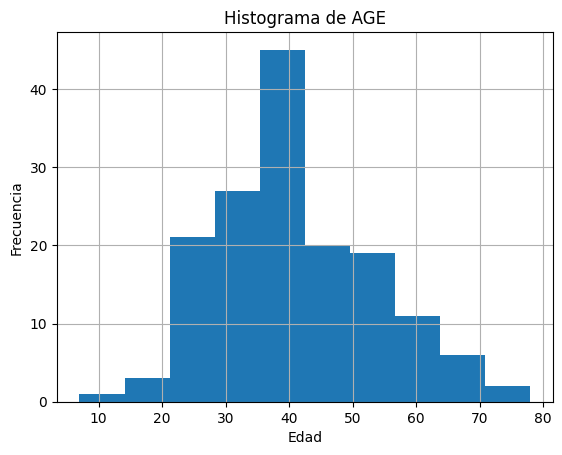

In [100]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

In [101]:
scaler = StandardScaler()
df_hepatitis['AGE'] = scaler.fit_transform(df_hepatitis[['AGE']])

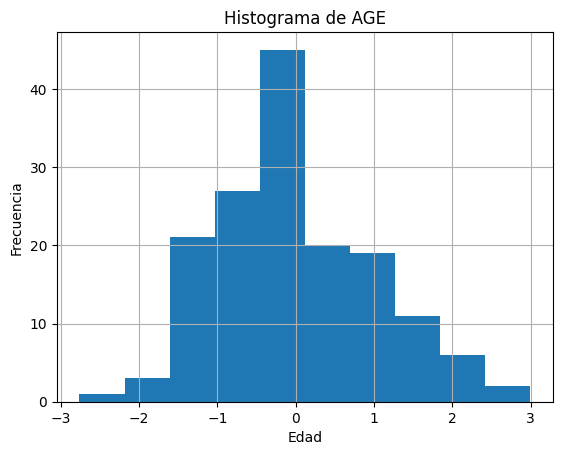

In [102]:
df_hepatitis['AGE'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

## SEX

In [103]:
print(df_hepatitis['SEX'])

0      2.1
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
150    1.0
151    1.0
152    1.0
153    2.0
154    1.0
Name: SEX, Length: 155, dtype: float64


In [104]:
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(1,0) #0 Male
df_hepatitis['SEX'] = df_hepatitis['SEX'].replace(2,1) #1 Female

moda_SEX = df_hepatitis['SEX'].mode()

df_hepatitis['SEX'] = df_hepatitis['SEX'].apply(lambda x: x if x in [1, 0] else np.nan)
df_hepatitis['SEX'] = df_hepatitis['SEX'].fillna(moda_SEX[0])


df_hepatitis['SEX'].value_counts()

SEX
0.0    140
1.0     15
Name: count, dtype: int64

## STEROID

In [105]:
print(df_hepatitis['STEROID'].value_counts())

STEROID
2                73
1                70
inconsistente     3
?                 1
Name: count, dtype: int64


In [106]:
df_hepatitis['STEROID'] = pd.to_numeric(df_hepatitis['STEROID'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_STEROID = df_hepatitis['STEROID'].mode()
moda_STEROID = moda_STEROID[0] if not moda_STEROID.empty else 0
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].fillna(moda_STEROID)

# Paso 6: Convertir a tipo int
df_hepatitis['STEROID'] = df_hepatitis['STEROID'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['STEROID'].value_counts())

STEROID
1    85
0    70
Name: count, dtype: int64


## ANTIVIRALS

In [107]:
print(df_hepatitis['ANTIVIRALS'].value_counts())

ANTIVIRALS
2.000000     119
1.000000      24
13.526762      4
2.200000       1
Name: count, dtype: int64


In [108]:
df_hepatitis['ANTIVIRALS'] = pd.to_numeric(df_hepatitis['ANTIVIRALS'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ANTIVIRALS = df_hepatitis['ANTIVIRALS'].mode()
moda_ANTIVIRALS = moda_ANTIVIRALS[0] if not moda_ANTIVIRALS.empty else 0
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].fillna(moda_ANTIVIRALS)

# Paso 6: Convertir a tipo int
df_hepatitis['ANTIVIRALS'] = df_hepatitis['ANTIVIRALS'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ANTIVIRALS'].value_counts())

ANTIVIRALS
1    131
0     24
Name: count, dtype: int64


## FATIGUE

In [109]:
df_hepatitis['FATIGUE'].value_counts()

FATIGUE
1                96
2                46
inconsistente     3
2.3               1
?                 1
Name: count, dtype: int64

In [110]:
df_hepatitis['FATIGUE']

0      2.3
1        1
2      NaN
3        2
4        2
      ... 
150      1
151      1
152      1
153      1
154      1
Name: FATIGUE, Length: 155, dtype: object

In [111]:
df_hepatitis['FATIGUE'] = pd.to_numeric(df_hepatitis['FATIGUE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_FATIGUE = df_hepatitis['FATIGUE'].mode()
moda_FATIGUE = moda_FATIGUE[0] if not moda_FATIGUE.empty else 0
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].fillna(moda_FATIGUE)

# Paso 6: Convertir a tipo int
df_hepatitis['FATIGUE'] = df_hepatitis['FATIGUE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['FATIGUE'].value_counts())

FATIGUE
0    109
1     46
Name: count, dtype: int64


## MALAISE

In [112]:
df_hepatitis['MALAISE'].value_counts()

MALAISE
2                85
1                57
inconsistente     3
2.4               1
?                 1
Name: count, dtype: int64

In [113]:
df_hepatitis['MALAISE']

0      2.4
1        2
2        2
3        2
4        2
      ... 
150      1
151      2
152      1
153    NaN
154      2
Name: MALAISE, Length: 155, dtype: object

In [114]:
df_hepatitis['MALAISE'] = pd.to_numeric(df_hepatitis['MALAISE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_MALAISE = df_hepatitis['MALAISE'].mode()
moda_MALAISE = moda_MALAISE[0] if not moda_MALAISE.empty else 0
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].fillna(moda_MALAISE)

# Paso 6: Convertir a tipo int
df_hepatitis['MALAISE'] = df_hepatitis['MALAISE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['MALAISE'].value_counts())

MALAISE
1    98
0    57
Name: count, dtype: int64


## ANOREXIA

In [115]:
df_hepatitis['ANOREXIA'].value_counts()

ANOREXIA
2                111
1                 31
inconsistente      3
2.5                1
?                  1
Name: count, dtype: int64

In [116]:
df_hepatitis['ANOREXIA']

0      2.5
1        2
2        2
3        2
4        2
      ... 
150      1
151      2
152      2
153      2
154      2
Name: ANOREXIA, Length: 155, dtype: object

In [117]:
df_hepatitis['ANOREXIA'] = pd.to_numeric(df_hepatitis['ANOREXIA'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ANOREXIA = df_hepatitis['ANOREXIA'].mode()
moda_ANOREXIA = moda_ANOREXIA[0] if not moda_ANOREXIA.empty else 0
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].fillna(moda_ANOREXIA)

# Paso 6: Convertir a tipo int
df_hepatitis['ANOREXIA'] = df_hepatitis['ANOREXIA'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ANOREXIA'].value_counts())

ANOREXIA
1    124
0     31
Name: count, dtype: int64


## LIVER BIG

In [118]:
df_hepatitis['LIVER BIG'].value_counts()

LIVER BIG
2                111
1                 23
?                  9
inconsistente      3
1.1                1
Name: count, dtype: int64

In [119]:
df_hepatitis['LIVER BIG'] = pd.to_numeric(df_hepatitis['LIVER BIG'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_MALAISE = df_hepatitis['LIVER BIG'].mode()
moda_MALAISE = moda_MALAISE[0] if not moda_MALAISE.empty else 0
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].fillna(moda_MALAISE)

# Paso 6: Convertir a tipo int
df_hepatitis['LIVER BIG'] = df_hepatitis['LIVER BIG'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['LIVER BIG'].value_counts())

LIVER BIG
1    132
0     23
Name: count, dtype: int64


## LIVER FIRM

In [120]:
df_hepatitis['LIVER FIRM'].value_counts()

LIVER FIRM
2                74
1                58
?                11
inconsistente     3
2.6               1
Name: count, dtype: int64

In [121]:
df_hepatitis['LIVER FIRM'] = pd.to_numeric(df_hepatitis['LIVER FIRM'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_FIRM = df_hepatitis['LIVER FIRM'].mode()
moda_FIRM = moda_FIRM[0] if not moda_FIRM.empty else 0
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].fillna(moda_FIRM)

# Paso 6: Convertir a tipo int
df_hepatitis['LIVER FIRM'] = df_hepatitis['LIVER FIRM'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['LIVER FIRM'].value_counts())

LIVER FIRM
1    97
0    58
Name: count, dtype: int64


## SPLEEN PALPABLE

In [122]:
df_hepatitis['SPLEEN PALPABLE'].value_counts()

SPLEEN PALPABLE
2                113
1                 26
?                  4
inconsistente      3
2.7                1
Name: count, dtype: int64

In [123]:
df_hepatitis['SPLEEN PALPABLE'] = pd.to_numeric(df_hepatitis['SPLEEN PALPABLE'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_SPLEEN = df_hepatitis['SPLEEN PALPABLE'].mode()
moda_SPLEEN = moda_SPLEEN[0] if not moda_SPLEEN.empty else 0
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].fillna(moda_SPLEEN)

# Paso 6: Convertir a tipo int
df_hepatitis['SPLEEN PALPABLE'] = df_hepatitis['SPLEEN PALPABLE'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['SPLEEN PALPABLE'].value_counts())

SPLEEN PALPABLE
1    129
0     26
Name: count, dtype: int64


## SPIDERS

In [124]:
df_hepatitis['SPIDERS'].value_counts()

SPIDERS
2                89
1                50
?                 4
inconsistente     3
2.8               1
Name: count, dtype: int64

In [125]:
df_hepatitis['SPIDERS'] = pd.to_numeric(df_hepatitis['SPIDERS'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_SPIDERS = df_hepatitis['SPIDERS'].mode()
moda_SPIDERS = moda_SPIDERS[0] if not moda_SPIDERS.empty else 0
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].fillna(moda_SPIDERS)

# Paso 6: Convertir a tipo int
df_hepatitis['SPIDERS'] = df_hepatitis['SPIDERS'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['SPIDERS'].value_counts())

SPIDERS
1    105
0     50
Name: count, dtype: int64


## ASCITES

In [126]:
df_hepatitis['ASCITES'].value_counts()

ASCITES
2                120
1                 19
?                  4
inconsistente      3
2.9                1
Name: count, dtype: int64

In [127]:
df_hepatitis['ASCITES'] = pd.to_numeric(df_hepatitis['ASCITES'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_ASCITES = df_hepatitis['ASCITES'].mode()
moda_ASCITES = moda_ASCITES[0] if not moda_ASCITES.empty else 0
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].fillna(moda_ASCITES)

# Paso 6: Convertir a tipo int
df_hepatitis['ASCITES'] = df_hepatitis['ASCITES'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['ASCITES'].value_counts())

ASCITES
1    136
0     19
Name: count, dtype: int64


## VARICES

In [128]:
df_hepatitis['VARICES'].value_counts()

VARICES
2                121
1                 17
?                  5
inconsistente      3
2.10               1
Name: count, dtype: int64

In [129]:
df_hepatitis['VARICES'] = pd.to_numeric(df_hepatitis['VARICES'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_VARICES = df_hepatitis['VARICES'].mode()
moda_VARICES = moda_VARICES[0] if not moda_VARICES.empty else 0
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].fillna(moda_VARICES)

# Paso 6: Convertir a tipo int
df_hepatitis['VARICES'] = df_hepatitis['VARICES'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['VARICES'].value_counts())

VARICES
1    138
0     17
Name: count, dtype: int64


## BILIRUBIN

In [130]:
df_hepatitis['BILIRUBIN'].value_counts()

BILIRUBIN
1.00             28
0.70             22
0.90             12
0.60             10
0.80              9
1.20              8
1.50              6
1.30              5
?                 5
4.60              4
inconsistente     3
1.60              3
1.70              3
2.00              3
0.50              2
2.80              2
0.40              2
1.40              2
2.30              2
3.20              2
1.80              1
0.30              1
2.20              1
3.50              1
2.50              1
4.80              1
3.00              1
2.40              1
1.10              1
2.90              1
8.00              1
3.90              1
1.90              1
4.20              1
7.60              1
Name: count, dtype: int64

In [131]:
df_hepatitis['BILIRUBIN']

0      1.00
1      0.90
2      0.70
3      0.70
4      1.00
       ... 
150    7.60
151    0.90
152     NaN
153    1.50
154    1.20
Name: BILIRUBIN, Length: 155, dtype: object

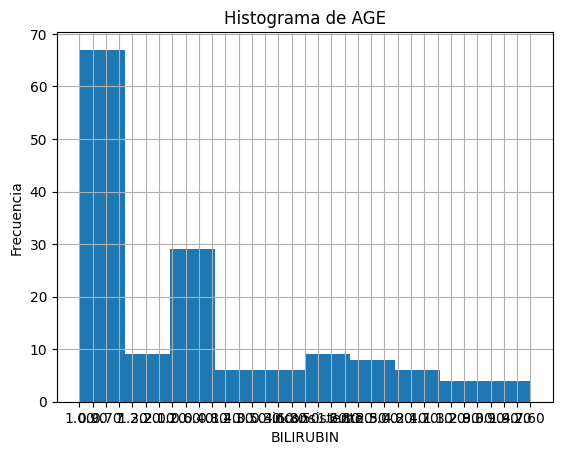

In [132]:
df_hepatitis['BILIRUBIN'].hist(bins=10)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de AGE')
plt.show()

In [133]:
df_hepatitis['BILIRUBIN'] = pd.to_numeric(df_hepatitis['BILIRUBIN'], errors='coerce')
df_hepatitis['BILIRUBIN'] = df_hepatitis['BILIRUBIN'].apply(lambda x: x if x < 4 else np.nan)

mean_BILIRUBIN = df_hepatitis['BILIRUBIN'].mean()
df_hepatitis['BILIRUBIN'] = df_hepatitis['BILIRUBIN'].fillna(mean_BILIRUBIN)

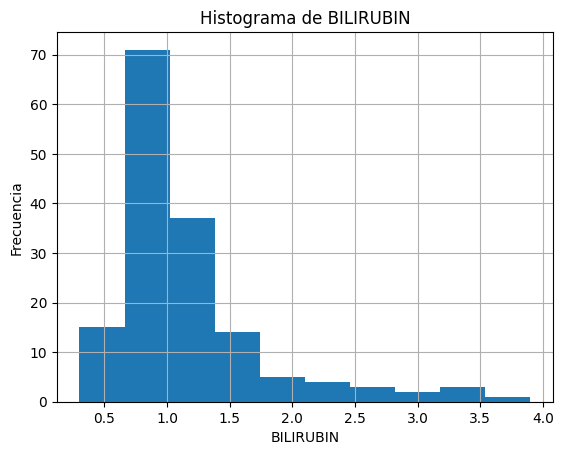

In [134]:
df_hepatitis['BILIRUBIN'].hist(bins=10)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

In [135]:
df_hepatitis['BILIRUBIN'] = scaler.fit_transform(df_hepatitis[['BILIRUBIN']])

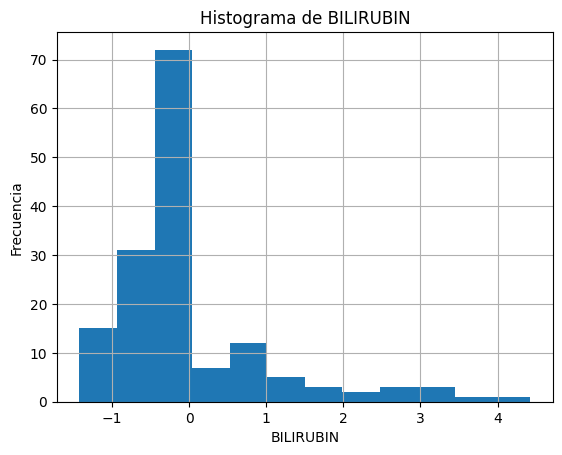

In [136]:
df_hepatitis['BILIRUBIN'].hist(bins=12)
plt.xlabel('BILIRUBIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## ALK PHOSPHATE

In [137]:
df_hepatitis['ALK PHOSPHATE'].value_counts()

ALK PHOSPHATE
?                28
85               17
62                4
81                4
inconsistente     3
                 ..
130               1
295               1
65                1
109               1
89                1
Name: count, Length: 82, dtype: int64

In [138]:
df_hepatitis['ALK PHOSPHATE']

0       85
1      NaN
2       96
3       46
4        ?
      ... 
150      ?
151    NaN
152     75
153     81
154    100
Name: ALK PHOSPHATE, Length: 155, dtype: object

In [139]:
df_hepatitis['ALK PHOSPHATE'] = pd.to_numeric(df_hepatitis['ALK PHOSPHATE'], errors='coerce')

mean_ALK_PHOSPHATE = df_hepatitis['ALK PHOSPHATE'].mean()
df_hepatitis['ALK PHOSPHATE'] = df_hepatitis['ALK PHOSPHATE'].fillna(mean_ALK_PHOSPHATE)

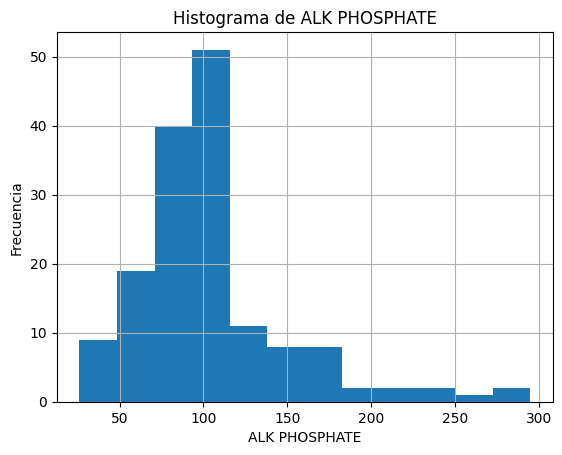

In [140]:
df_hepatitis['ALK PHOSPHATE'].hist(bins=12)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('Frecuencia')
plt.title('Histograma de ALK PHOSPHATE')
plt.show()

In [141]:
df_hepatitis['ALK PHOSPHATE'] = scaler.fit_transform(df_hepatitis[['ALK PHOSPHATE']])

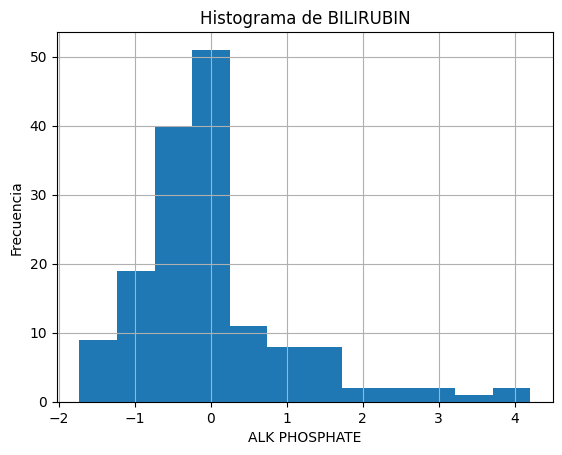

In [142]:
df_hepatitis['ALK PHOSPHATE'].hist(bins=12)
plt.xlabel('ALK PHOSPHATE')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## SGOT

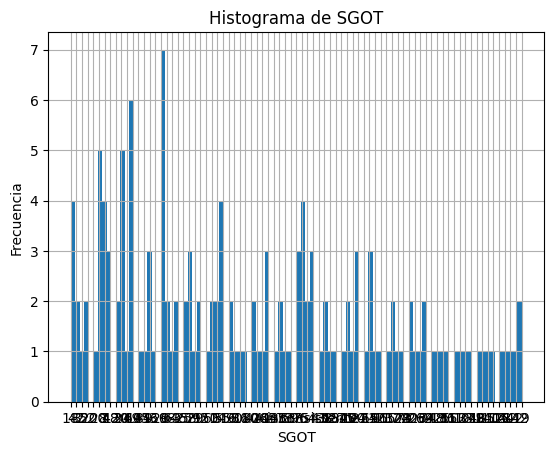

In [143]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=100)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de SGOT')
plt.show()

In [144]:
df_hepatitis['SGOT'] = pd.to_numeric(df_hepatitis['SGOT'], errors='coerce')

mean_SGOT = df_hepatitis['SGOT'].mean()
df_hepatitis['SGOT'] = df_hepatitis['SGOT'].fillna(mean_SGOT)

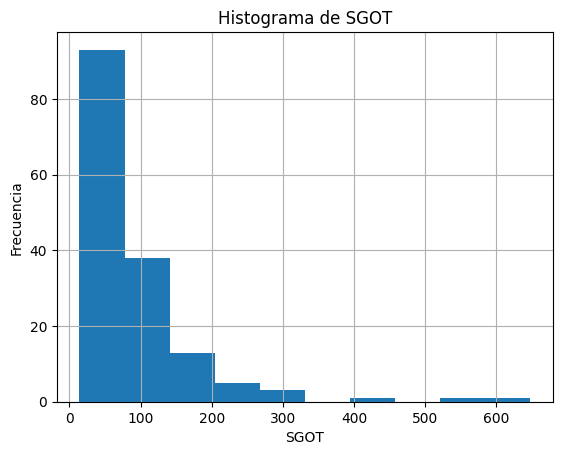

In [145]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=10)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de SGOT')
plt.show()

In [146]:
df_hepatitis['SGOT'] = scaler.fit_transform(df_hepatitis[['SGOT']])

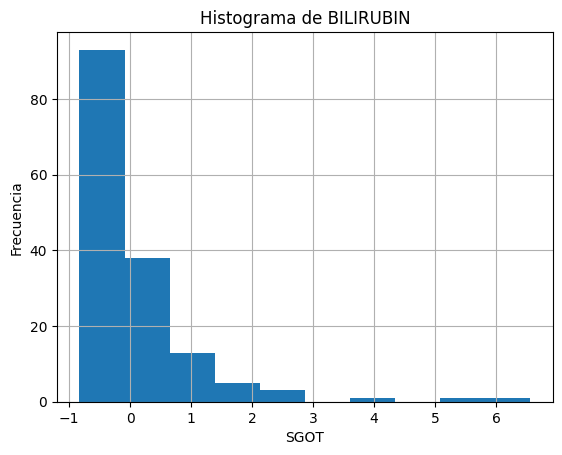

In [147]:
df_hepatitis['SGOT'].value_counts()
df_hepatitis['SGOT'].hist(bins=10)
plt.xlabel('SGOT')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## ALBUMIN

In [148]:
df_hepatitis['ALBUMIN'].value_counts()


ALBUMIN
4.0              23
?                14
4.2              12
4.4               9
3.9               8
4.1               8
3.8               8
4.3               6
3.3               6
3.5               5
2.9               5
4.5               4
3.4               4
3.0               4
inconsistente     3
2.7               3
3.1               3
2.6               3
2.8               3
3.6               2
4.6               2
3.7               2
4.9               2
4.7               1
5.0               1
4.8               1
5.3               1
2.1               1
6.4               1
2.2               1
2.4               1
Name: count, dtype: int64

In [149]:
df_hepatitis['ALBUMIN'] = pd.to_numeric(df_hepatitis['ALBUMIN'], errors='coerce')

mean_ALBUMIN = df_hepatitis['ALBUMIN'].mean()
df_hepatitis['ALBUMIN'] = df_hepatitis['ALBUMIN'].fillna(mean_ALBUMIN)

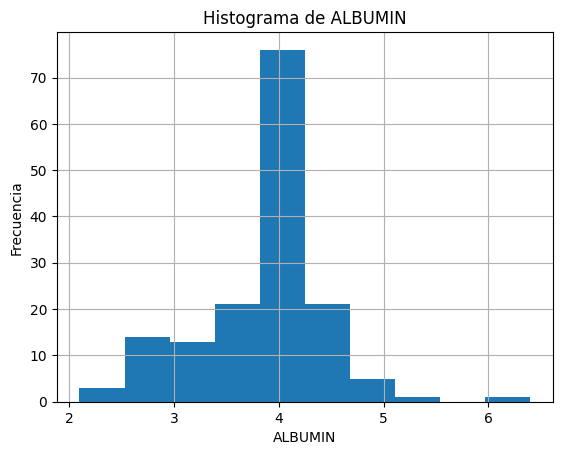

In [150]:
df_hepatitis['ALBUMIN'].value_counts()
df_hepatitis['ALBUMIN'].hist(bins=10)
plt.xlabel('ALBUMIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de ALBUMIN')
plt.show()

In [151]:
df_hepatitis['ALBUMIN'] = scaler.fit_transform(df_hepatitis[['ALBUMIN']])

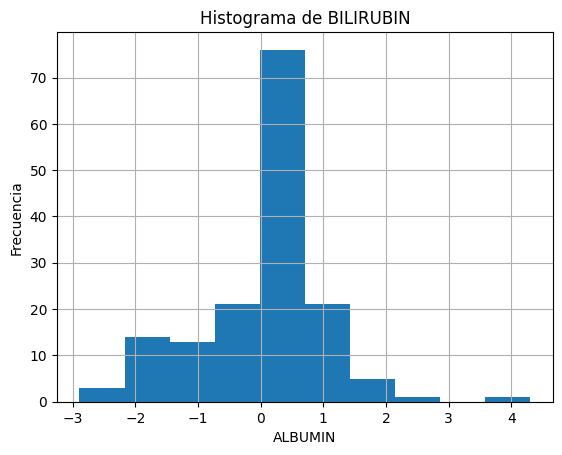

In [152]:
df_hepatitis['ALBUMIN'].value_counts()
df_hepatitis['ALBUMIN'].hist(bins=10)
plt.xlabel('ALBUMIN')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## PROTIME

In [153]:
df_hepatitis['PROTIME'].value_counts()

PROTIME
?                61
100              10
46                4
85                4
74                4
52                3
66                3
41                3
31                3
57                3
90                3
inconsistente     3
62                2
63                2
56                2
54                2
29                2
70                2
67                2
50                2
60                2
73                2
47                1
39                1
64                1
78                1
80                1
75                1
21                1
36                1
76                1
77                1
40                1
84                1
38                1
51                1
23                1
58                1
72                1
32                1
30                1
0                 1
43                1
35                1
48                1
42                1
Name: count, dtype: int64

In [154]:
df_hepatitis['PROTIME'] = pd.to_numeric(df_hepatitis['PROTIME'], errors='coerce')

mean_PROTIME = df_hepatitis['PROTIME'].mean()
df_hepatitis['PROTIME'] = df_hepatitis['PROTIME'].fillna(mean_PROTIME)

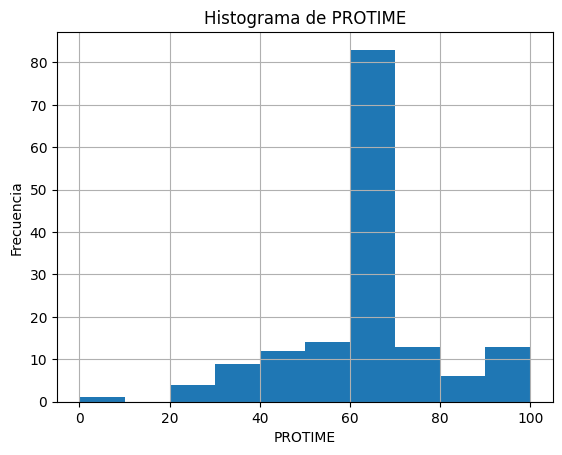

In [155]:
df_hepatitis['PROTIME'].value_counts()
df_hepatitis['PROTIME'].hist(bins=10)
plt.xlabel('PROTIME')
plt.ylabel('Frecuencia')
plt.title('Histograma de PROTIME')
plt.show()

In [156]:
df_hepatitis['PROTIME'] = scaler.fit_transform(df_hepatitis[['PROTIME']])

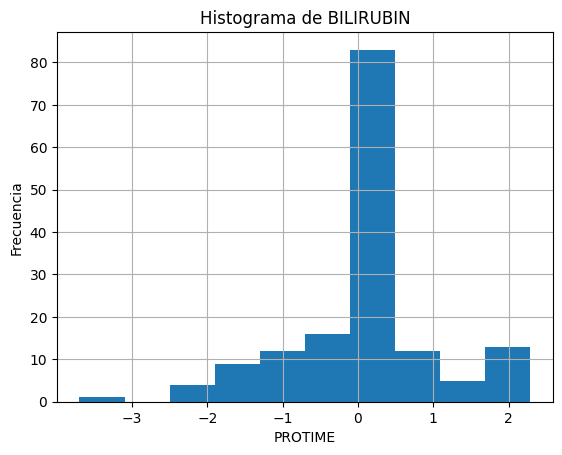

In [157]:
df_hepatitis['PROTIME'].value_counts()
df_hepatitis['PROTIME'].hist(bins=10)
plt.xlabel('PROTIME')
plt.ylabel('Frecuencia')
plt.title('Histograma de BILIRUBIN')
plt.show()

## HISTOLOGY

In [158]:
df_hepatitis['HISTOLOGY'].value_counts()

HISTOLOGY
1.000000    75
2.000000    67
9.649002     4
1.200000     1
Name: count, dtype: int64

In [159]:
df_hepatitis['HISTOLOGY'] = pd.to_numeric(df_hepatitis['HISTOLOGY'], errors='coerce')

# Paso 3: Mantener solo valores 0, 1 y 2
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].apply(lambda x: x if x in [0, 1, 2] else np.nan)

# Paso 4: Reemplazar 1 por 0 y 2 por 1
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].replace({1: 0, 2: 1})

# Paso 5: Calcular la moda de la columna y rellenar los NaN con ella
moda_HISTOLOGY = df_hepatitis['HISTOLOGY'].mode()
moda_HISTOLOGY = moda_HISTOLOGY[0] if not moda_HISTOLOGY.empty else 0
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].fillna(moda_HISTOLOGY)

# Paso 6: Convertir a tipo int
df_hepatitis['HISTOLOGY'] = df_hepatitis['HISTOLOGY'].astype(int)

# Verificar la distribución de valores
print(df_hepatitis['HISTOLOGY'].value_counts())

HISTOLOGY
0    88
1    67
Name: count, dtype: int64


In [160]:
print(df_hepatitis.isna().sum())  

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


# Modelado

In [161]:
print(df_hepatitis.isna().sum())  

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64


In [162]:
#%% Evaluar accuracy, precision, recall y F1
def obtener_metricas_evaluacion(y_real, y_predicho):
    '''Obtener metricas de evaluacion'''
    print('Accuracy:', accuracy_score(y_real, y_predicho))
    print('Precision:', precision_score(y_real, y_predicho))
    print('Recall:', recall_score(y_real, y_predicho))
    print('F1:', f1_score(y_real, y_predicho))
    
    matrix_confusion = confusion_matrix(y_real, y_predicho)
    sns.heatmap(matrix_confusion, annot=True, fmt='d')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

### PCA

In [163]:
df_hepatitis_PC = df_hepatitis.drop(columns = ['Class'])
df_hepatitis_Supervivientes = df_hepatitis['Class']


In [164]:
print(df_hepatitis_PC.shape)

(155, 19)


In [165]:
pca = PCA(n_components=19)
PCA_hepatitis = pca.fit_transform(df_hepatitis_PC)

#Componentes Principales de PC1 a PC19
PC = [f'PC{i}' for i in range(1, 20)]

df_pca_hepatitis = pd.DataFrame(data = PCA_hepatitis, columns = PC)



In [166]:
def biplot(etiquetas, columnas, df_pca, pca, componente_x, componente_y, title = 'Biplot', incluir_nombres = False):
    plt.figure(figsize = (14, 8))
    pcx_txt = f'PC{componente_x}'
    pcy_txt = f'PC{componente_y}'

    survived_colors = ['red' if val == 0 else 'green' for val in etiquetas]  # 0 en rojo, 1 en verde
    plt.scatter(df_pca[pcx_txt], df_pca[pcy_txt], alpha = 0.5, c=survived_colors)
    
    plt.title(title)
    plt.xlabel(f'{pcx_txt} {round(pca.explained_variance_ratio_[componente_x-1] * 100, 2)}%')
    plt.ylabel(f'{pcy_txt} {round(pca.explained_variance_ratio_[componente_y-1] * 100, 2)}%')
    for i, (pc1, pc2) in enumerate(zip(pca.components_[componente_x-1], pca.components_[componente_y-1])):
    # Aumentar tamaño de flechas
        pc1 *= 6
        pc2 *= 6
        plt.arrow(0, 0, pc1, pc2, head_width = 0.1, head_length = 0.1, linewidth = 2, color = 'black')
        plt.text(pc1, pc2, columnas[i], color = 'black', ha = 'right', va = 'bottom')  # Cambiado i+1 por i

    # Mostrar el nombre en cada punto
    if incluir_nombres:
        for i, nombre in enumerate(etiquetas):
            plt.text(df_pca[pcx_txt][i], df_pca[pcy_txt][i], nombre, color = 'blue', ha = 'left', va = 'bottom')
    plt.grid()
    plt.show()

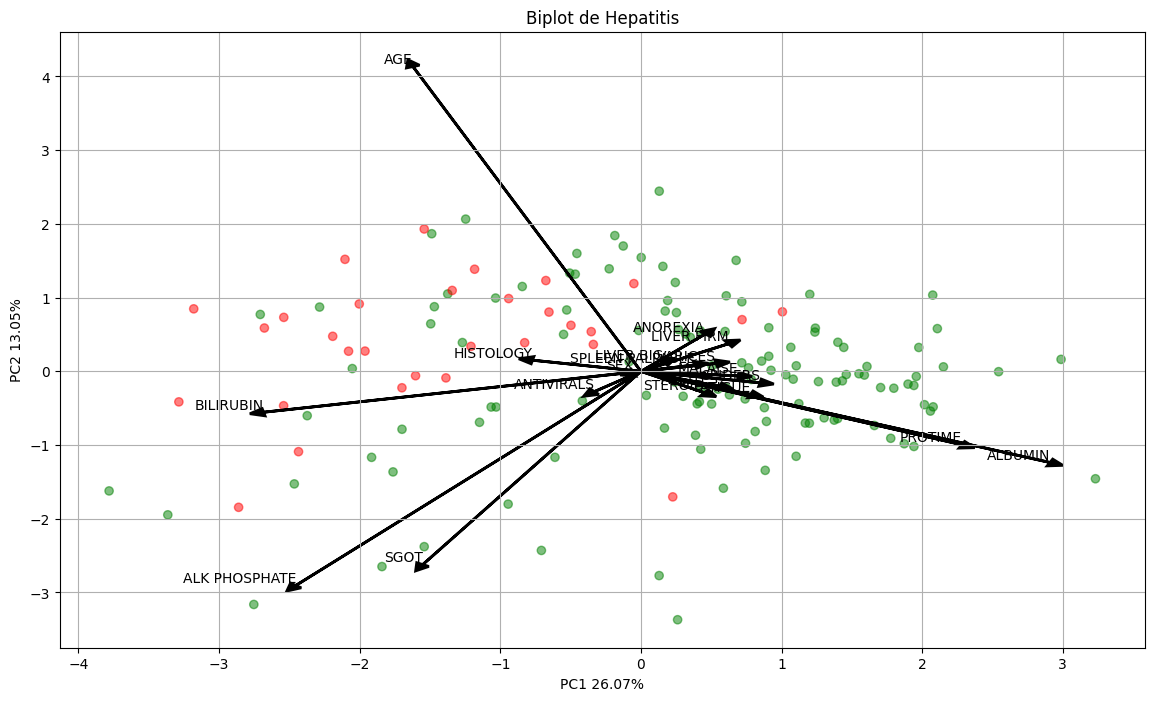

In [167]:
#%% Graficar biplot
biplot(df_hepatitis_Supervivientes, df_hepatitis_PC.columns, df_pca_hepatitis, pca, componente_x = 1, componente_y = 2, title = 'Biplot de Hepatitis', incluir_nombres = False)



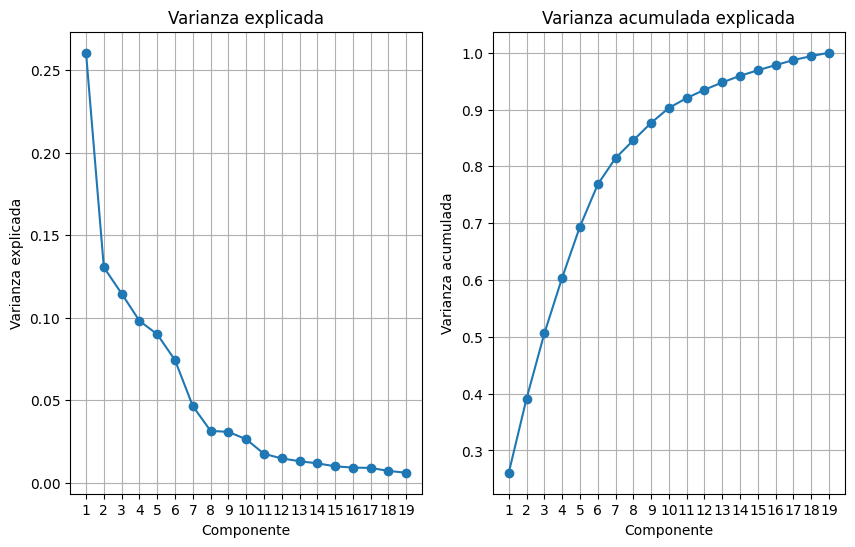

In [168]:
# Crear figura y definir tamaño
plt.figure(figsize=(10, 6))

# Subgráfico para la varianza explicada
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Varianza explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.grid()
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ticks del eje X como enteros

# Subgráfico para la varianza acumulada explicada
plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza acumulada explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Ticks del eje X como enteros

# Mostrar gráfico
plt.show()

### Definiendo los SETS

In [169]:
X = df_hepatitis.drop(columns = ['Class'])
y = df_hepatitis['Class']

In [170]:
#Los datos ya estan escalados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_training = X_train 
Y_training = y_train

#%% Dividir train en train y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Clasificación (LOGIT REGRESSION)

Se entrena el modelo con los training set con distintos vecinos, luego se comprueba cual es el mejor usando el validation set. Finalmente entrenamos el modelo con el mejor estimador, es decir, el que tiene el menor error con los datos de validation y finalmente comprobamos el modelo tomando el TEST set, es la prueba de fuego.

Precisión con C=0.0001: 0.8000
Precisión con C=0.001: 0.8000
Precisión con C=0.01: 0.8000
Precisión con C=0.1: 0.8000
Precisión con C=1: 0.8800
Precisión con C=10: 0.9200
Precisión con C=100: 0.9600
Precisión con C=1000: 0.9600
Precisión con C=10000: 0.9600
Mejor valor de C encontrado: 100 con precisión de validación: 0.9600
Accuracy: 0.7096774193548387
Precision: 0.8333333333333334
Recall: 0.8
F1: 0.8163265306122449


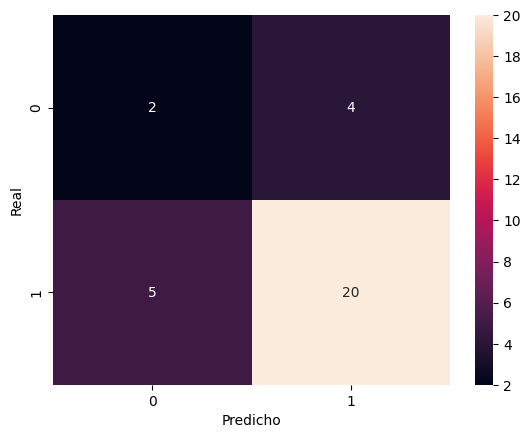

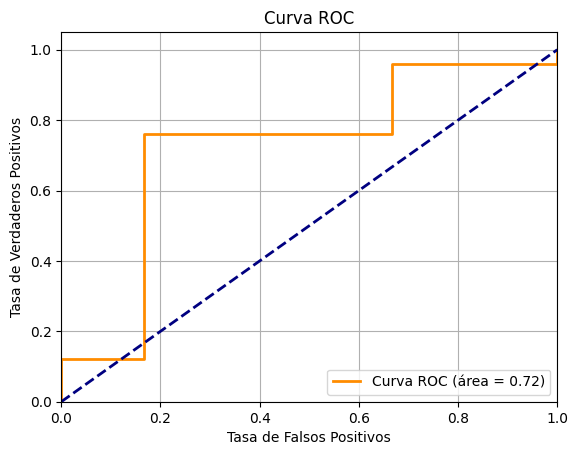

In [171]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
best_C = None
best_accuracy = 0

for C in C_values:
    # l1 Lasso , l2 Ridge
    # 'saga' descenso de gradiente estocástico.
    model = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=10000)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Precisión con C={C}: {accuracy:.4f}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

print(f"Mejor valor de C encontrado: {best_C} con precisión de validación: {best_accuracy:.4f}")

final_model = LogisticRegression(penalty='l1', solver='saga', C=best_C, max_iter=100000)

final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
obtener_metricas_evaluacion(y_test, y_test_pred)

y_test_prob = final_model.predict_proba(X_test)[:, 1] 

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Imprimir la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Clasificacion (Arboles de Decision)

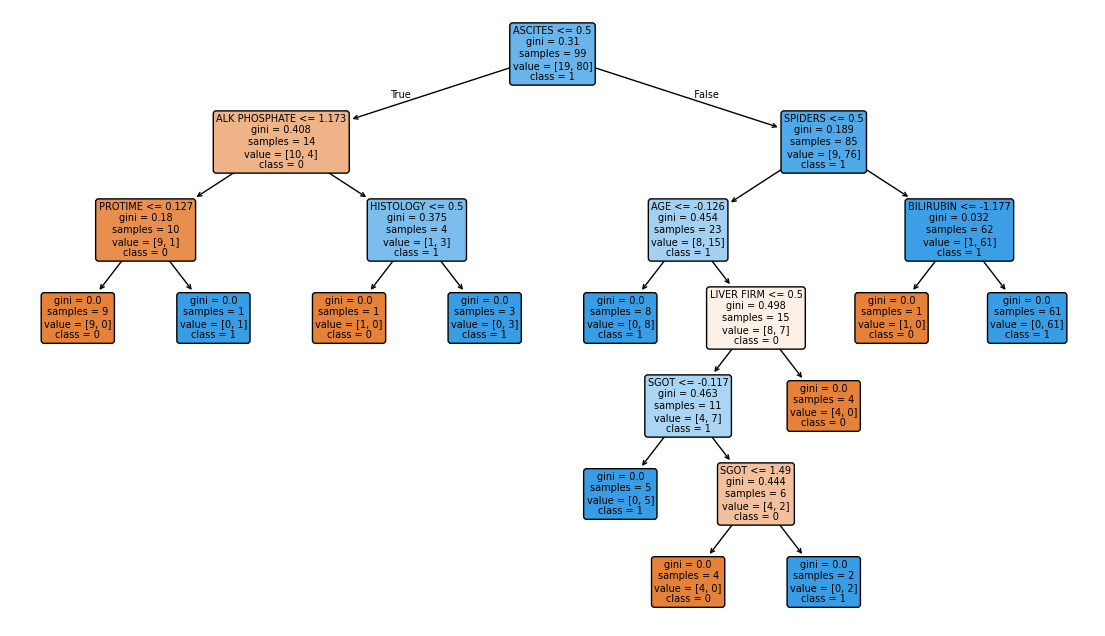

Accuracy: 0.88
Precision: 0.9047619047619048
Recall: 0.95
F1: 0.926829268292683


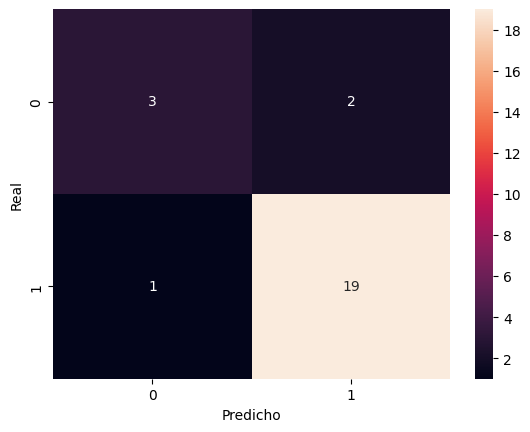

In [172]:
modelo_decision_tree = DecisionTreeClassifier()
modelo_decision_tree.fit(X_train, y_train)
y_pred = modelo_decision_tree.predict(X_val)

# %% Mostrar arbol de decision con plot_tree
plt.figure(figsize=(14, 8))  
plot_tree(modelo_decision_tree, 
          feature_names=X_train.columns, 
          class_names=['0', '1'], 
          filled=True, 
          rounded=True)
plt.show()

obtener_metricas_evaluacion(y_val, y_pred)



### KNN

Usamos el modelo KNN.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejor número de vecinos: 8
Accuracy: 0.7741935483870968
Precision: 0.8461538461538461
Recall: 0.88
F1: 0.8627450980392157


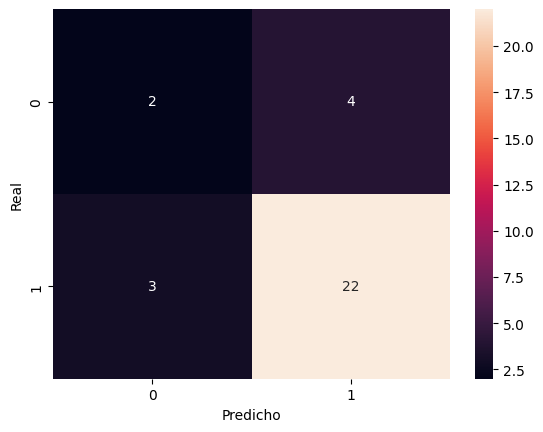

In [173]:
param_grid = {
    'n_neighbors': list(range(1, 31))  # Probar valores de 1 a 30 vecinos
}

modelo_knn = KNeighborsClassifier()

# Configurar la búsqueda de grilla (Grid Search) con CV
grid_search = GridSearchCV(estimator=modelo_knn, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


grid_search.fit(X_training, Y_training)

mejor_n_vecinos = grid_search.best_params_['n_neighbors']
print("Mejor número de vecinos:", mejor_n_vecinos)

mejor_modelo = grid_search.best_estimator_
y_test_pred = mejor_modelo.predict(X_test)
obtener_metricas_evaluacion(y_test, y_test_pred)

### Support Vector Machine (SVM)

Accuracy: 0.96
Precision: 0.9523809523809523
Recall: 1.0
F1: 0.975609756097561


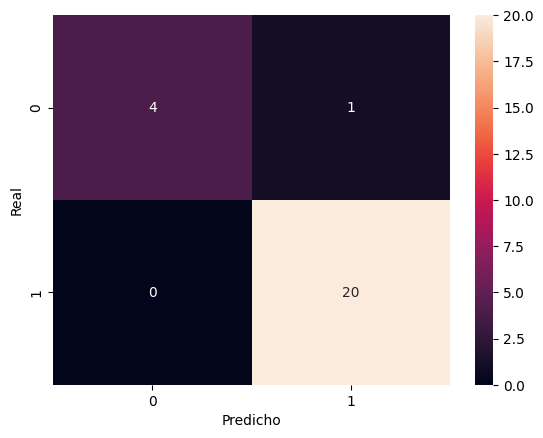

In [174]:
# %% Entrenar modelo SVM
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)
y_pred = modelo_svm.predict(X_val)

obtener_metricas_evaluacion(y_val, y_pred)

### Random Forest

Primero hicimos la prediccion en el conjunto de validacion que nos dio bastante bien y luego lo pasamos al conjunto de prueba y tuvimos 8 errores a la hora de predecir. 

Luego probamos algunos ajustes cambiando hiperparametros hasta obtener la mayor precision posible. Finalmente llegamos a un modelo que predijo un poco mejor el conjunto de prueba, con 7 errores.

Accuracy: 0.92
Precision: 0.95
Recall: 0.95
F1: 0.95


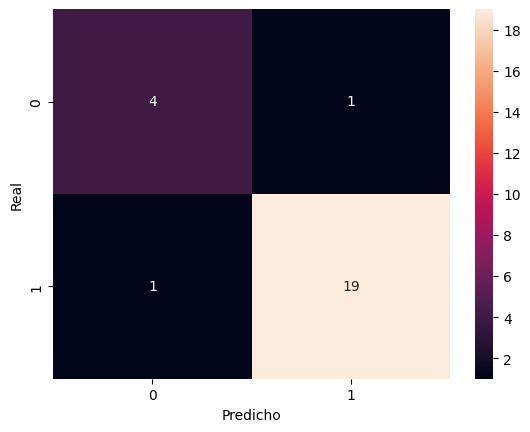

In [ ]:
# Crear y entrenar el modelo de Random Forest
modelo_random_forest = RandomForestClassifier(random_state=42)
modelo_random_forest.fit(X_train, y_train)

# Hacer predicciones en el conjunto de validación
y_pred_val = modelo_random_forest.predict(X_val)

# Evaluar el modelo en el conjunto de validación
obtener_metricas_evaluacion(y_val, y_pred_val)

Accuracy: 0.7419354838709677
Precision: 0.8148148148148148
Recall: 0.88
F1: 0.8461538461538461


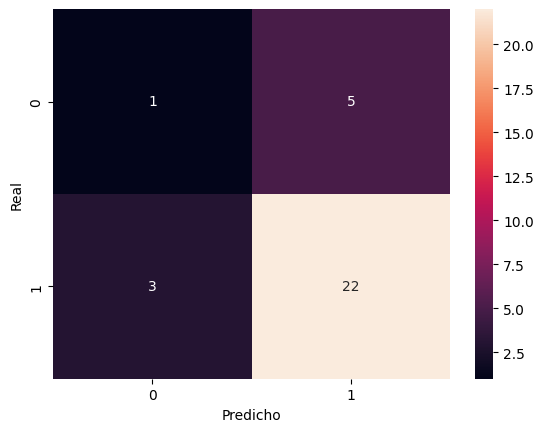

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred_test = modelo_random_forest.predict(X_test)

# Evaluar el modelo en el conjunto de prueba
obtener_metricas_evaluacion(y_test, y_pred_test)

Precisión con n_estimators=50, max_depth=None: 0.9200
Precisión con n_estimators=50, max_depth=10: 0.9200
Precisión con n_estimators=50, max_depth=20: 0.9200
Precisión con n_estimators=50, max_depth=30: 0.9200
Precisión con n_estimators=100, max_depth=None: 0.9200
Precisión con n_estimators=100, max_depth=10: 0.9200
Precisión con n_estimators=100, max_depth=20: 0.9200
Precisión con n_estimators=100, max_depth=30: 0.9200
Precisión con n_estimators=200, max_depth=None: 0.8800
Precisión con n_estimators=200, max_depth=10: 0.8800
Precisión con n_estimators=200, max_depth=20: 0.8800
Precisión con n_estimators=200, max_depth=30: 0.8800
Precisión con n_estimators=300, max_depth=None: 0.8800
Precisión con n_estimators=300, max_depth=10: 0.8800
Precisión con n_estimators=300, max_depth=20: 0.8800
Precisión con n_estimators=300, max_depth=30: 0.8800
Mejor n_estimators: 50, Mejor max_depth: None, Precisión: 0.9200
Precisión en el conjunto de prueba: 0.7742
Accuracy: 0.7741935483870968
Precision: 

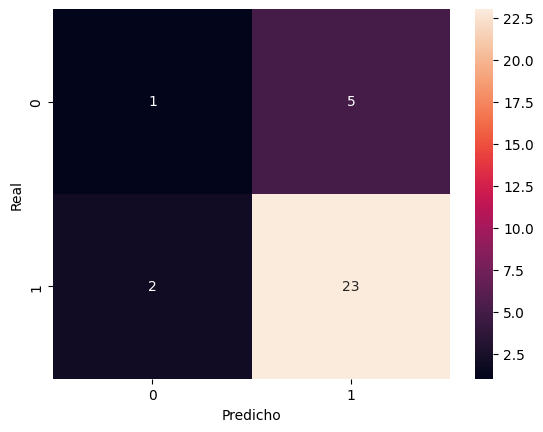

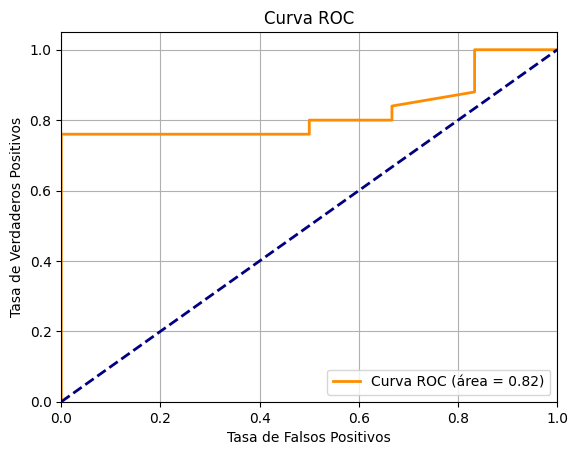

In [196]:
# Rango de valores para n_estimators y max_depth
n_estimators_values = [50, 100, 200, 300]
max_depth_values = [None, 10, 20, 30]

best_n_estimators = None
best_max_depth = None
best_accuracy = 0

# Búsqueda de hiperparámetros
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_val_pred)
        print(f'Precisión con n_estimators={n_estimators}, max_depth={max_depth}: {accuracy:.4f}')
        
        # Guardar el mejor modelo
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print(f"Mejor n_estimators: {best_n_estimators}, Mejor max_depth: {best_max_depth}, Precisión: {best_accuracy:.4f}")

# Entrenar el modelo final con los mejores hiperparámetros
final_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_model.fit(X_train, y_train)
y_test_pred = final_model.predict(X_test)

# Evaluación en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')
obtener_metricas_evaluacion(y_test, y_test_pred)

# Obtener probabilidades de predicción
y_test_prob = final_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

# Imprimir la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
